In [1]:
import numpy as np
import copy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

import torch
import torch.nn as nn

In [2]:
# device = torch.device("cuda:0")
device = torch.device("cpu")

## 1D regression

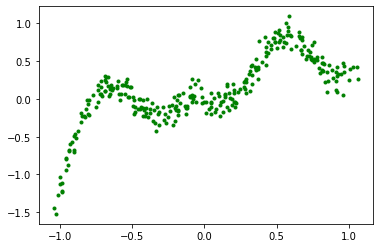

In [3]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = torch.Tensor(x.reshape(-1,1))
yy = torch.Tensor(y.reshape(-1,1))

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [4]:
import dtnnlib as dtnn

In [5]:
net = nn.Sequential(
    dtnn.StereographicTransform(1, 5),
#     nn.Linear(1, 5),
    nn.BatchNorm1d(5),
#     nn.LeakyReLU(0.1),
#     nn.ELU(),
    dtnn.StereographicTransform(5, 1),
#     nn.Linear(5, 1),
    nn.BatchNorm1d(1),
    )

In [6]:
# for i in range(len(net)):
#     if isinstance(net[i], nn.BatchNorm1d):
#         net[i].weight.data *= -1

In [7]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.003)
criterion = nn.MSELoss()

In [8]:
yout = net.forward(xx)

In [9]:
xx.shape, yout.shape

(torch.Size([300, 1]), torch.Size([300, 1]))

In [10]:
yout

tensor([[ 1.0030],
        [ 1.0049],
        [ 1.0059],
        [ 1.0120],
        [ 1.0184],
        [ 1.0259],
        [ 1.0261],
        [ 1.0291],
        [ 1.0321],
        [ 1.0341],
        [ 1.0387],
        [ 1.0454],
        [ 1.0478],
        [ 1.0497],
        [ 1.0499],
        [ 1.0510],
        [ 1.0694],
        [ 1.0697],
        [ 1.0699],
        [ 1.0716],
        [ 1.0760],
        [ 1.0774],
        [ 1.0785],
        [ 1.0792],
        [ 1.0812],
        [ 1.0870],
        [ 1.0935],
        [ 1.0955],
        [ 1.0958],
        [ 1.0973],
        [ 1.0995],
        [ 1.1013],
        [ 1.1049],
        [ 1.1051],
        [ 1.1108],
        [ 1.1181],
        [ 1.1190],
        [ 1.1192],
        [ 1.1255],
        [ 1.1286],
        [ 1.1315],
        [ 1.1321],
        [ 1.1344],
        [ 1.1368],
        [ 1.1381],
        [ 1.1410],
        [ 1.1434],
        [ 1.1442],
        [ 1.1474],
        [ 1.1494],
        [ 1.1515],
        [ 1.1572],
        [ 1.

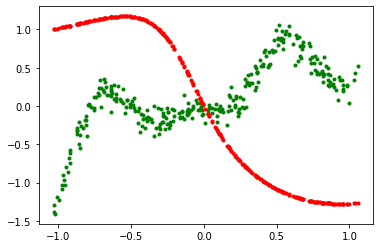

In [11]:
%matplotlib inline

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.data.reshape(-1), marker='.', color='r')
plt.show()

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(10000):

    yout = net(xx)
    loss = criterion(yout, yy)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print(epoch, 'Error = ', float(loss))
        ax.clear()
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.data.reshape(-1), color='r', marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")

0 Error =  1.8073151111602783


100 Error =  0.31323060393333435


200 Error =  0.13317705690860748


300 Error =  0.08048588037490845


400 Error =  0.06328033655881882


500 Error =  0.05801650881767273


600 Error =  0.05644115433096886


700 Error =  0.05581507831811905


800 Error =  0.05542493984103203


900 Error =  0.05511845275759697


1000 Error =  0.05485834181308746


1100 Error =  0.0546141043305397


1200 Error =  0.05420259013772011


1300 Error =  0.049220263957977295


1400 Error =  0.03946748375892639


1500 Error =  0.04270944371819496


1600 Error =  0.034897685050964355


1700 Error =  0.030729321762919426


1800 Error =  0.02945578657090664


1900 Error =  0.028431911021471024


2000 Error =  0.02783898264169693


2100 Error =  0.027464570477604866


2200 Error =  0.027602853253483772


2300 Error =  0.026803074404597282


2400 Error =  0.02668260969221592


2500 Error =  0.026540353894233704


2600 Error =  0.026260672137141228


2700 Error =  0.02613439783453941

TclError: invalid command name "pyimage12"

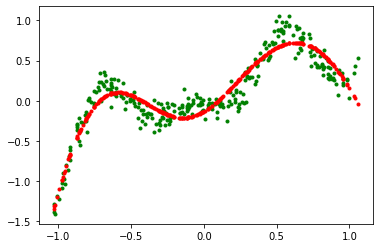

In [13]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.data.reshape(-1), color='r', marker='.')

## On 2D dataset

In [60]:
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [61]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

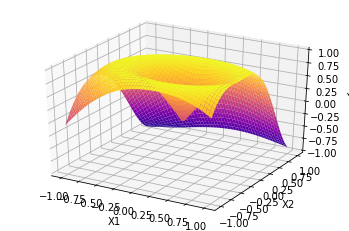

In [62]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [63]:
xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))

## Building 2D model

In [93]:
h = 5
net = nn.Sequential(
    dtnn.StereographicTransform(2, h),
#     dtnn.DistanceTransformEMA(2, h),
#     nn.BatchNorm1d(h),
    dtnn.OneActiv(h, mode='exp_1.6'),
#     nn.LeakyReLU(0.1),
    dtnn.StereographicTransform(h,1),
#     nn.Linear(h,1),
    nn.BatchNorm1d(1),
    )

In [94]:
for i in range(len(net)):
    if isinstance(net[i], nn.BatchNorm1d):
        net[i].weight.data *= -1

In [95]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.0031)
criterion = nn.MSELoss()

In [96]:
yout = net.forward(xx)
xx.shape, yout.shape

(torch.Size([2500, 2]), torch.Size([2500, 1]))

In [97]:
yout.data

tensor([[-0.6519],
        [-0.6806],
        [-0.7067],
        ...,
        [ 2.0977],
        [ 2.1247],
        [ 2.1476]])

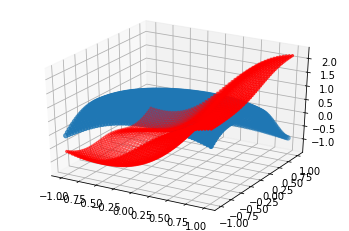

In [98]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.data.reshape(-1), color='r', marker='.')
plt.show()

In [99]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net(xx)
    loss = criterion(yout, yy)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print(epoch, 'Error = ', float(loss))
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.data.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)

0 Error =  1.6117463111877441
100 Error =  0.17202721536159515
200 Error =  0.05134401097893715
300 Error =  0.03195646405220032
400 Error =  0.024411113932728767
500 Error =  0.016790304332971573
600 Error =  0.010996346361935139
700 Error =  0.008786574937403202
800 Error =  0.007787142880260944
900 Error =  0.007060729432851076
1000 Error =  0.006441432051360607
1100 Error =  0.005857333540916443
1200 Error =  0.005261603742837906
1300 Error =  0.004627753980457783
1400 Error =  0.003976590931415558
1500 Error =  0.003406878560781479
1600 Error =  0.0030067679472267628
1700 Error =  0.002749948063865304
1800 Error =  0.002564725000411272
1900 Error =  0.0024075217079371214
2000 Error =  0.002262434223666787
2100 Error =  0.0021211206912994385
2200 Error =  0.001978903543204069
2300 Error =  0.0018314971821382642
2400 Error =  0.0016733778174966574
2500 Error =  0.0014981135027483106
2600 Error =  0.001301874523051083
2700 Error =  0.0011128601618111134
2800 Error =  0.00098734232597

TclError: invalid command name "pyimage315"

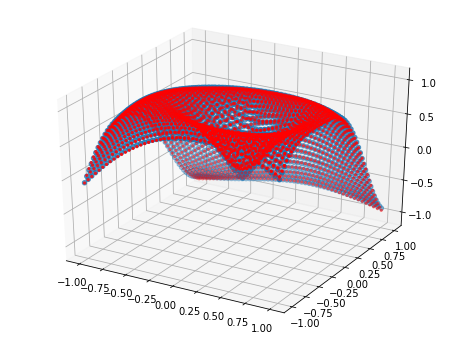

In [59]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.data.reshape(-1), color='r', marker='.')
plt.show()